# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [0]:
# save the url
wine_data_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [0]:
# import the library and read the file
# I had to use the sep because the file used ';' instead of ',' to separate
#   the information
import pandas as pd
df = pd.read_csv(wine_data_white, sep=';')

In [10]:
df.shape

(4898, 12)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
# Looks to be in the shape and size needed for the data set and matches the 
#   UCI page
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [31]:
df.isnull().sum()
# Doesn't look like there are any null values. I'm going to check to see if
#   there a value that represents null.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
df.dtypes
# All column types are numbers

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [17]:
df.describe()
# the only column with a zero in it is the citric acid, but that would actually 
#   make sense for the wines and doesn't sound like a value that would
#   replace a Null.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [0]:
# Looks like there is no missing Data in this set.

## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [33]:
# Import the library needed and upload the file
from google.colab import files
uploaded = files.upload()

Saving poker-hand-testing.data to poker-hand-testing.data


In [35]:
pht_df = pd.read_csv('poker-hand-testing.data')
pht_df.shape
# The number of columns is correct and the rows is correct as well 
#   except we need to make headers so that row 0 doesn't become the 
#   headers.

(999999, 11)

In [0]:
# Each poker hand consists of 5 cards and each column denotes either the rank 
#   or suit of each card in order and the last Column has a number that 
#   represents what kind of poker hand is achived with the mentioned cards.
col_headers = ['Suit of card #1', 'Rank of card #1', 'Suit of card #2', 
               'Rank of card #2', 'Suit of card #3', 'Rank of card #3', 
               'Suit of card #4', 'Rank of card #4', 'Suit of card #5', 
               'Rank of card #5', 'Poker Hand']

In [107]:
pht_df = pd.read_csv('poker-hand-testing.data', header=None, names= col_headers)
pht_df.head()
# Now it works correctly and it seems to be in order.

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [42]:
pht_df.tail()

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
999995,3,1,1,12,2,9,4,9,2,6,1
999996,3,3,4,5,2,7,1,4,4,3,1
999997,1,11,4,7,3,9,1,13,2,7,1
999998,3,11,1,8,1,1,3,13,2,8,1
999999,2,5,2,9,4,9,2,3,3,3,2


In [46]:
# Not showing any null values here either
pht_df.isnull().sum()

Suit of card #1    0
Rank of card #1    0
Suit of card #2    0
Rank of card #2    0
Suit of card #3    0
Rank of card #3    0
Suit of card #4    0
Rank of card #4    0
Suit of card #5    0
Rank of card #5    0
Poker Hand         0
dtype: int64

In [45]:
# all vlaues are Integers
pht_df.dtypes

Suit of card #1    int64
Rank of card #1    int64
Suit of card #2    int64
Rank of card #2    int64
Suit of card #3    int64
Rank of card #3    int64
Suit of card #4    int64
Rank of card #4    int64
Suit of card #5    int64
Rank of card #5    int64
Poker Hand         int64
dtype: object

In [43]:
# Only column that has a zero that might represent a null is Poker Hand,
#   but that was explained in the documetation that a zero actually 
#   means something.
pht_df.describe()

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500493,6.997927,2.499894,7.006097,2.500871,6.998873,2.500393,7.002298,2.499451,6.989481,0.616902
std,1.117768,3.743374,1.118568,3.743481,1.118225,3.741890,1.117245,3.741270,1.118948,3.739894,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [0]:
# No null values in theis dataset either.

In [0]:
# I'm going to make the Poker Hand Cloumn more readable by changing the numbers 
#   to what they mean
pht_df['Poker Hand'].replace(0, '0-Nothing',inplace=True)
pht_df['Poker Hand'].replace(1, '1-One Pair',inplace=True)
pht_df['Poker Hand'].replace(2, '2-Two Pair',inplace=True)
pht_df['Poker Hand'].replace(3, '3-Three of a Kind',inplace=True)
pht_df['Poker Hand'].replace(4, '4-Straight',inplace=True)
pht_df['Poker Hand'].replace(5, '5-Flush',inplace=True)
pht_df['Poker Hand'].replace(6, '6-Full House',inplace=True)
pht_df['Poker Hand'].replace(7, '7-Four of a Kind',inplace=True)
pht_df['Poker Hand'].replace(8, '8-Straight Flush',inplace=True)
pht_df['Poker Hand'].replace(9, '9-Royal Flush',inplace=True)

In [73]:
pht_df.sample(8)

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
940466,3,5,1,1,4,8,2,8,1,10,1-One Pair
89109,1,10,2,12,4,9,4,1,4,2,0-Nothing
441034,3,1,3,2,3,10,2,5,1,6,0-Nothing
652960,2,12,2,2,3,2,4,9,2,8,1-One Pair
729132,2,6,4,3,1,11,3,5,2,10,0-Nothing
223110,2,6,1,5,3,12,4,12,2,3,1-One Pair
476329,1,4,1,7,2,5,1,8,4,2,0-Nothing
164012,3,12,2,9,4,11,4,9,2,4,1-One Pair


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [74]:
# Your Code Here

# a cross tab as to what poker hands are most likely depending on what the suit 
#   of card number 1 is.
pd.crosstab(pht_df['Suit of card #1'], pht_df['Poker Hand'])

Poker Hand,0-Nothing,1-One Pair,2-Two Pair,3-Three of a Kind,4-Straight,5-Flush,6-Full House,7-Four of a Kind,8-Straight Flush,9-Royal Flush
Suit of card #1,,,,,,,,,,
1,125323,105645,11926,5208,930,468,375,59,3,0
2,124766,105610,11825,5305,980,505,339,63,4,1
3,125780,105804,12010,5336,1019,533,355,61,2,0
4,125340,105439,11861,5272,956,490,355,47,3,2


In [75]:
# a cross tab as to what poker hands are most likely depending on what the rank 
#   of card number 4 is.
pd.crosstab(pht_df['Rank of card #4'], pht_df['Poker Hand'])

Poker Hand,0-Nothing,1-One Pair,2-Two Pair,3-Three of a Kind,4-Straight,5-Flush,6-Full House,7-Four of a Kind,8-Straight Flush,9-Royal Flush
Rank of card #4,,,,,,,,,,
1,38587,32544,3543,1613,165,168,96,16,1,1
2,38772,32542,3669,1653,159,174,100,19,0,0
3,38600,32280,3740,1618,214,152,123,23,0,0
4,38502,32567,3682,1600,291,141,90,15,0,0
5,38496,32408,3646,1582,390,165,106,19,3,0
6,38464,32265,3614,1587,380,149,103,17,2,0
7,38803,32703,3713,1711,381,131,122,16,1,0
8,38477,32303,3690,1625,379,130,101,12,0,0
9,38513,32639,3645,1587,405,159,114,27,1,0


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

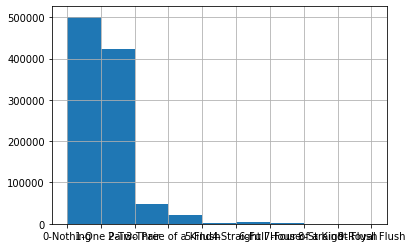

In [77]:
# A histogram of the likelyness of each poker hand
pht_df['Poker Hand'].hist(bins=9);

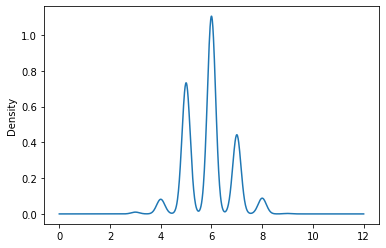

In [78]:
# A density plot of the quality of the wines in the set
df['quality'].plot.density();

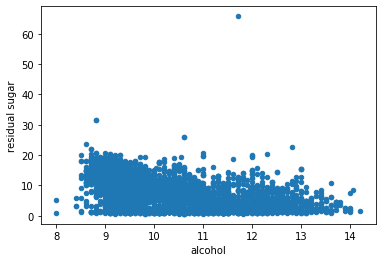

In [80]:
# A scatterplot of the relationship of alcohol and reisual sugar.
#   Doesn't look like there is much of a relationship.
df.plot.scatter('alcohol', 'residual sugar')

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [0]:
# Your Code Here
results = pd.crosstab(pht_df['Suit of card #3'], pht_df['Poker Hand'])

In [88]:
results

Poker Hand,0-Nothing,1-One Pair,2-Two Pair,3-Three of a Kind,4-Straight,5-Flush,6-Full House,7-Four of a Kind,8-Straight Flush,9-Royal Flush
Suit of card #3,,,,,,,,,,
1,125597,105318,12033,5341,966,468,326,49,3,0
2,124653,105670,11732,5134,933,505,346,61,4,1
3,125556,105907,11971,5314,1008,533,396,61,2,0
4,125403,105603,11886,5332,978,490,356,59,3,2


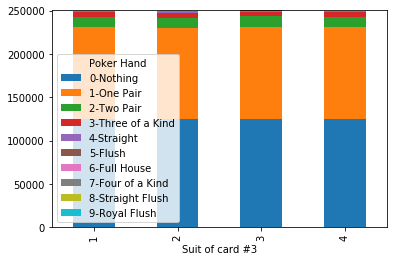

In [90]:
results.plot(kind='bar', stacked=True);

In [0]:
results2 = pd.crosstab(df['density'], df['quality'])

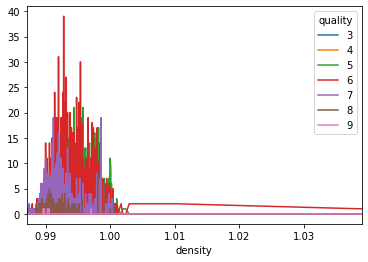

In [96]:
results2.plot();

In [97]:
# Not sure what I can do with this info but it's neat to know I can do a 
#   crosstab of a cross tab.
pd.crosstab(results['6-Full House'],results['7-Four of a Kind'])

7-Four of a Kind,49,59,61
6-Full House,,,
326,1,0,0
346,0,0,1
356,0,1,0
396,0,0,1


## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [109]:
# Using the pd.cut to change the number values of the suits to readable text
#   Works much better than what I did before to change the values of Poker Hand
suits = ['Hearts', 'Spades', 'Diamonds', 'Clubs']
pht_df['Suit of card #1'] = pd.cut(pht_df['Suit of card #1'], bins=4, labels=suits)
pht_df['Suit of card #2'] = pd.cut(pht_df['Suit of card #2'], bins=4, labels=suits)
pht_df['Suit of card #3'] = pd.cut(pht_df['Suit of card #3'], bins=4, labels=suits)
pht_df['Suit of card #4'] = pd.cut(pht_df['Suit of card #4'], bins=4, labels=suits)
pht_df['Suit of card #5'] = pd.cut(pht_df['Suit of card #5'], bins=4, labels=suits)

pht_df.head()

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
0,Hearts,1,Hearts,13,Spades,4,Spades,3,Hearts,12,0-Nothing
1,Diamonds,12,Diamonds,2,Diamonds,11,Clubs,5,Spades,5,1-One Pair
2,Hearts,9,Clubs,6,Hearts,4,Diamonds,2,Diamonds,9,1-One Pair
3,Hearts,4,Diamonds,13,Spades,13,Spades,1,Diamonds,6,1-One Pair
4,Diamonds,10,Spades,7,Hearts,2,Spades,11,Clubs,9,0-Nothing


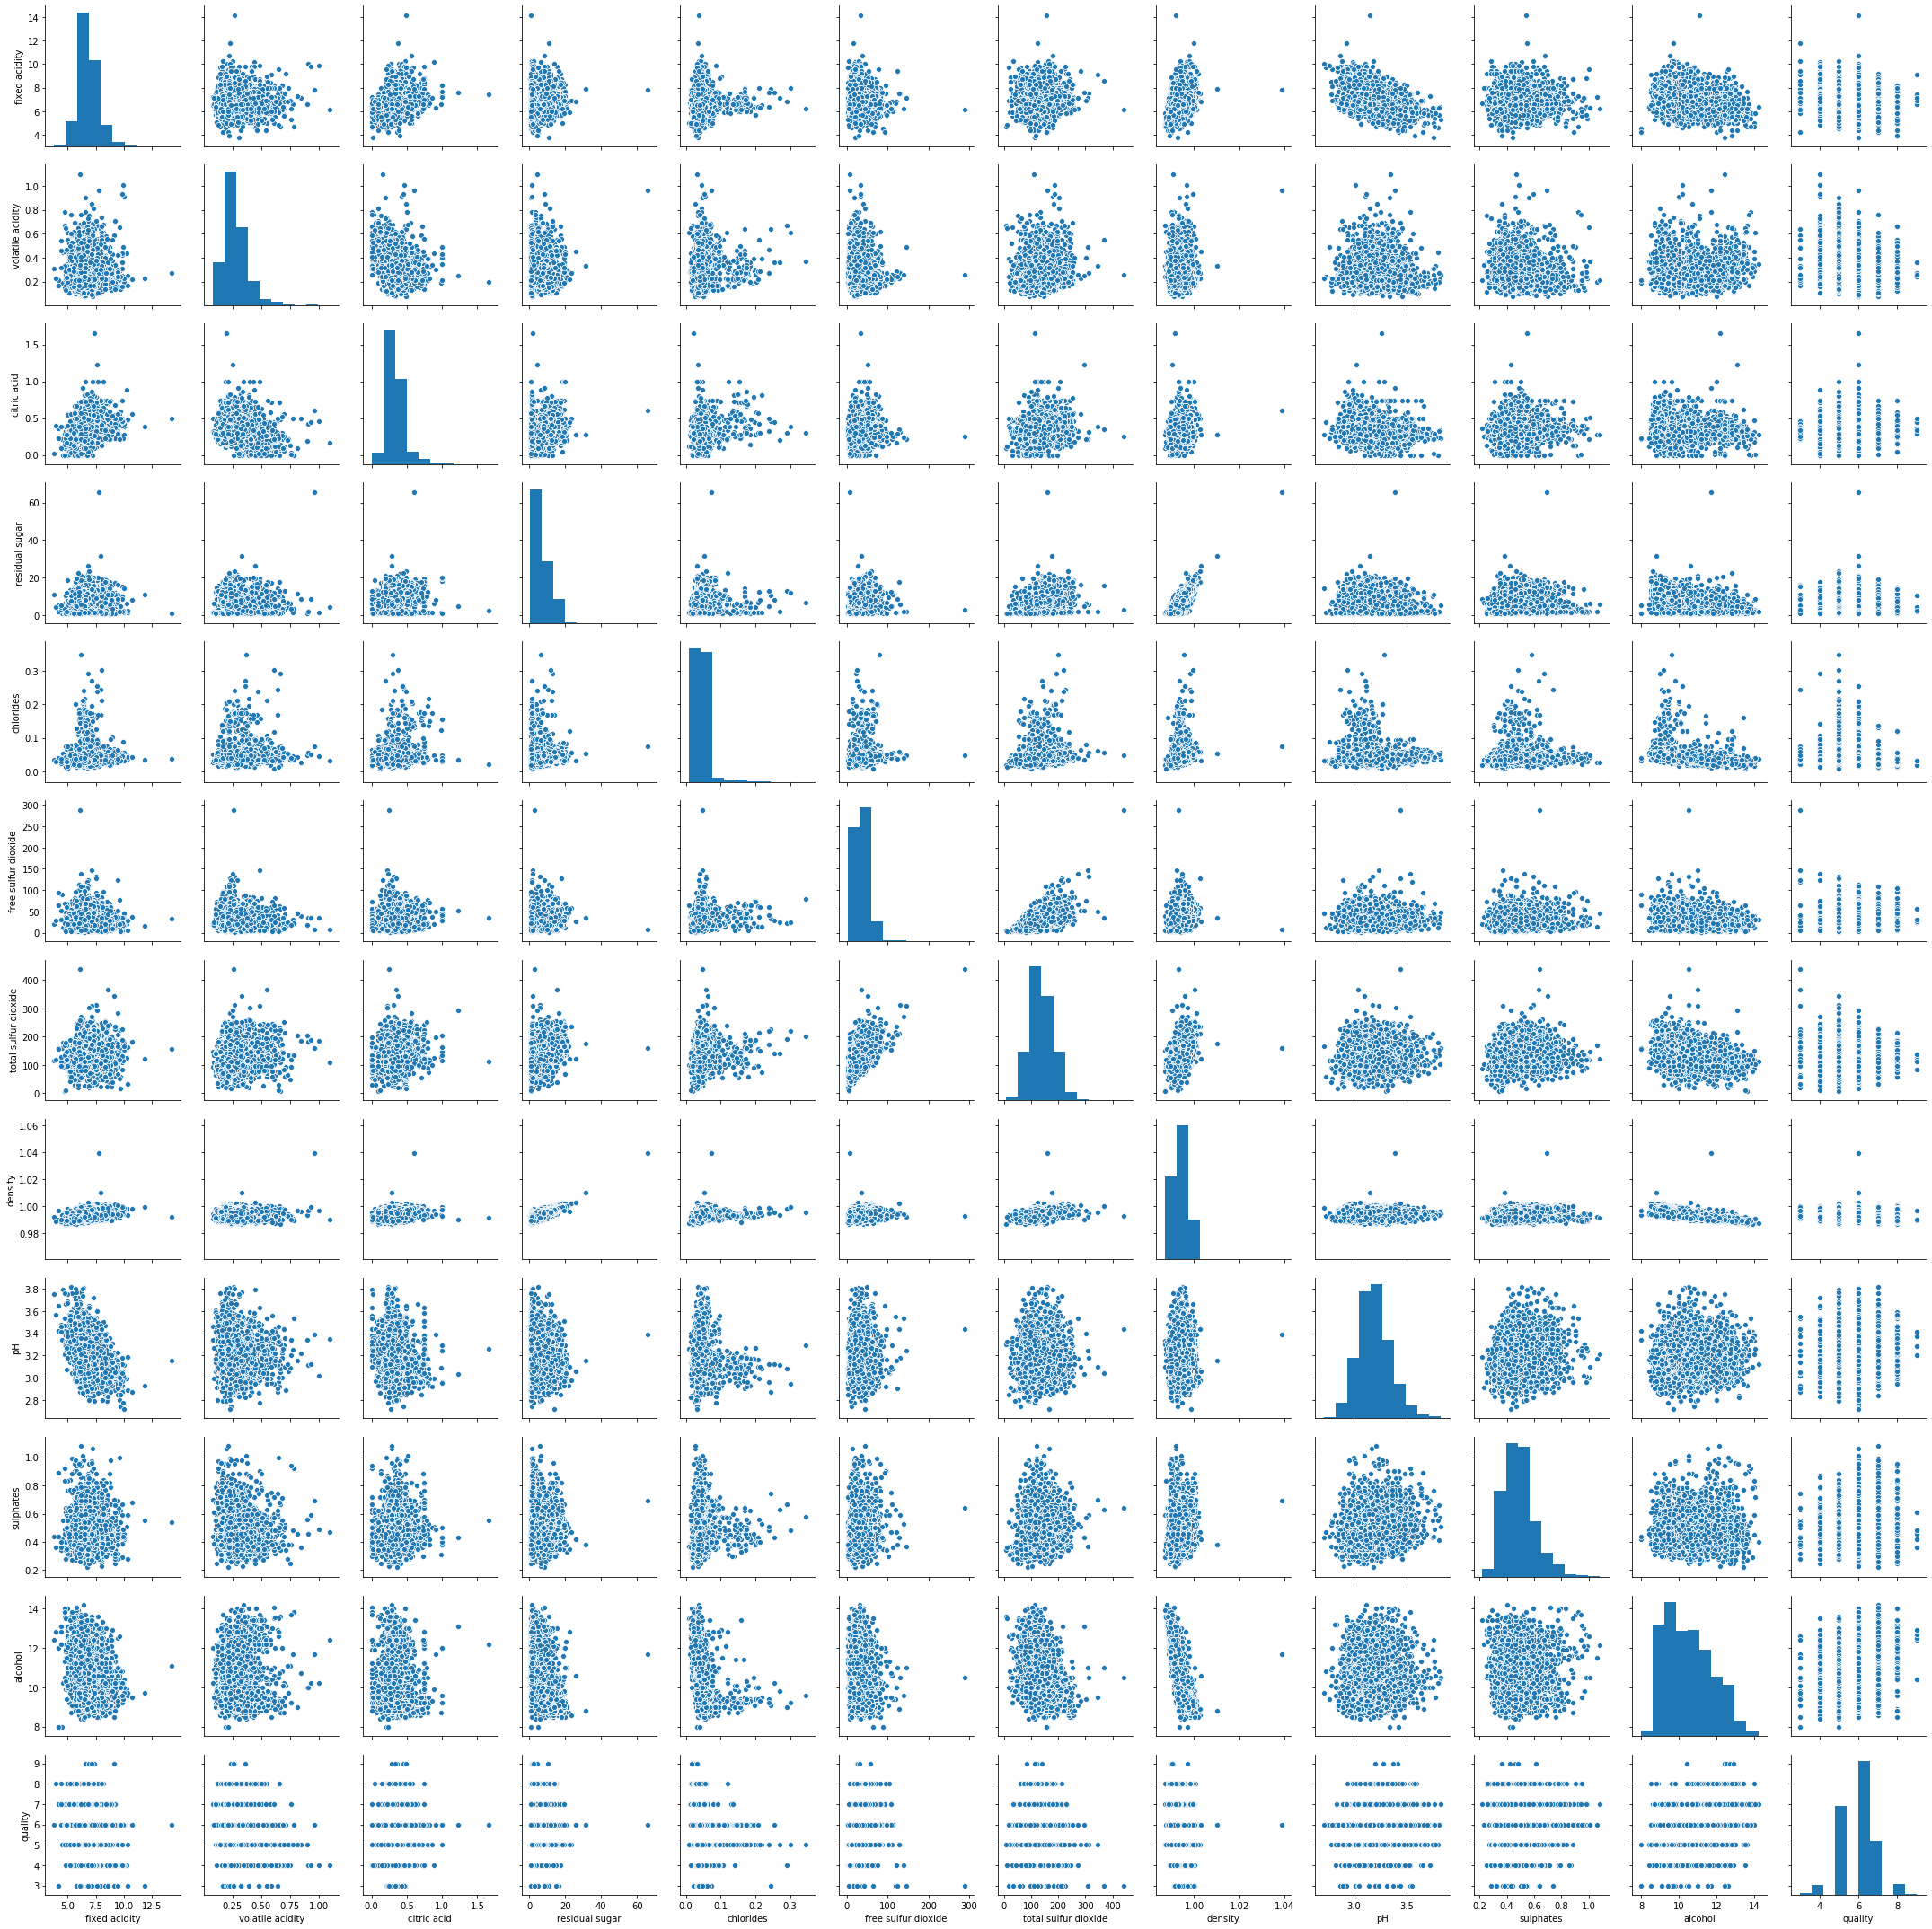

In [101]:
from seaborn import pairplot

pairplot(df);

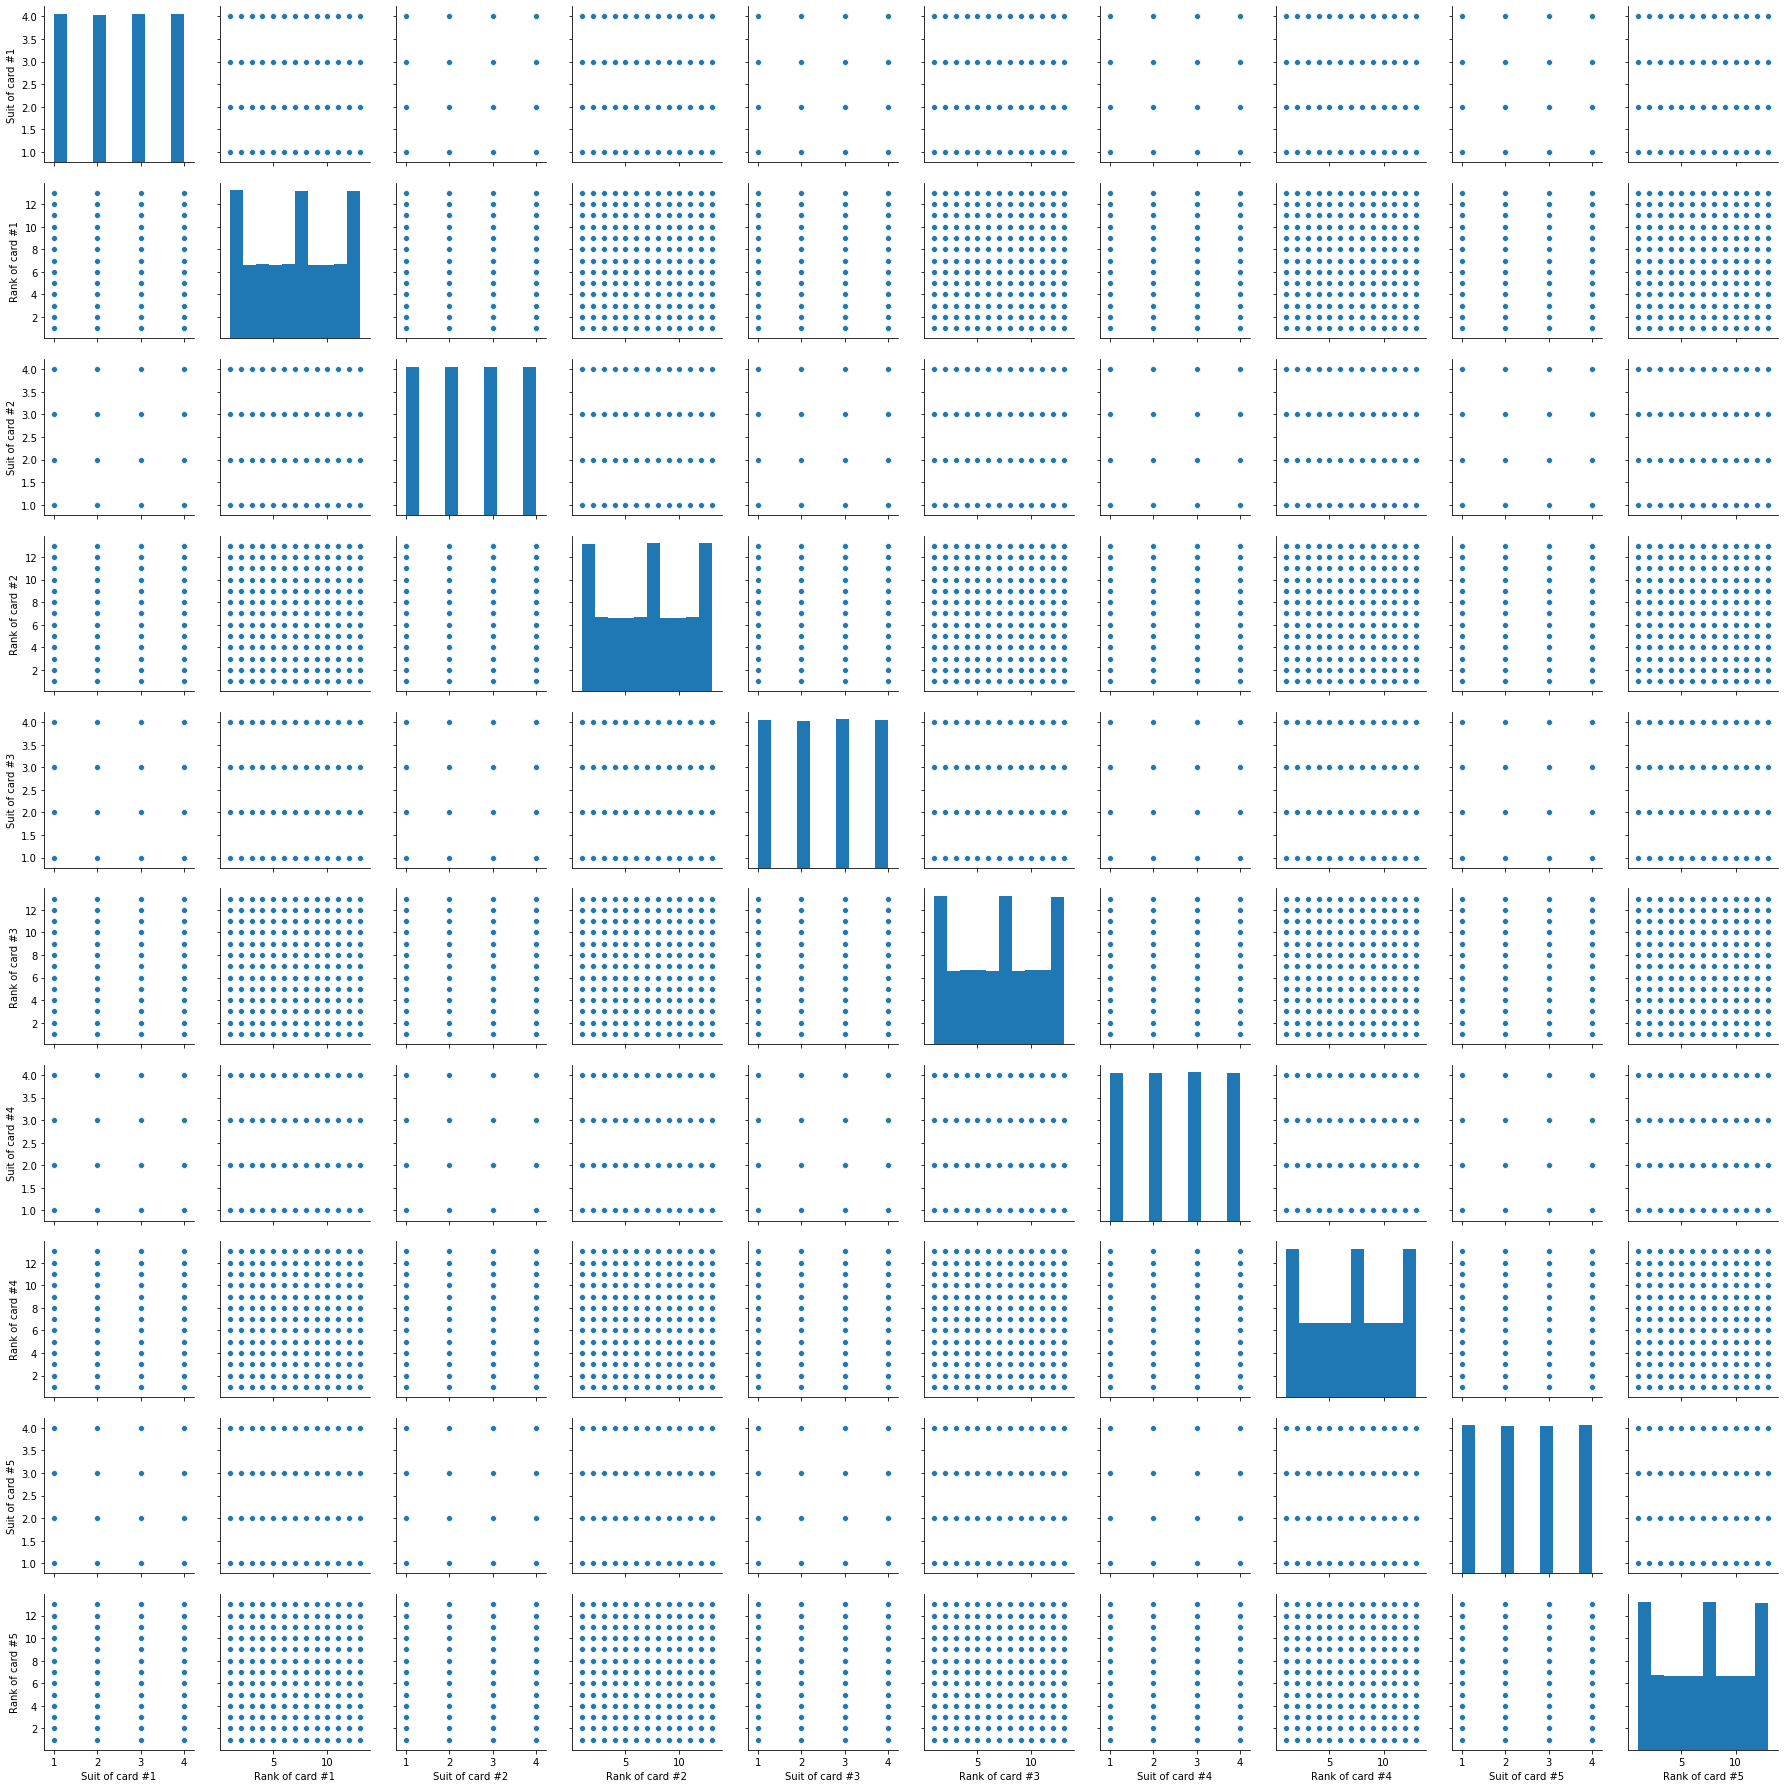

In [102]:
# Doesn't look like this was very helpful since all catagories were ints.
pairplot(pht_df);